# LDA for spooky dataset from kaggle

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bijul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bijul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
spooky = pd.read_csv("C:/Users/bijul/Documents/Development/Projects/LDA/spooky_train.csv")

In [3]:
spooky.head(), spooky.shape

(        id                                               text author
 0  id26305  This process, however, afforded me no means of...    EAP
 1  id17569  It never once occurred to me that the fumbling...    HPL
 2  id11008  In his left hand was a gold snuff box, from wh...    EAP
 3  id27763  How lovely is spring As we looked from Windsor...    MWS
 4  id12958  Finding nothing else, not even gold, the Super...    HPL,
 (19579, 3))

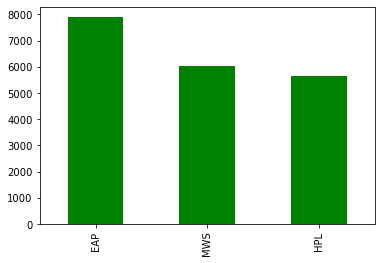

In [4]:
spooky.author.value_counts().plot(kind='bar',color='g') # there are 3 authors and texts from their books

# Pre-processing using NLTK - Tokenise, lemmatise, stemming and stop word removal

In [5]:
def preprocess(texts):
    texts = texts.lower()
    cleantext = re.sub('<.*?>', '', texts)
    cleantext = re.sub('[^A-Za-z ]+', ' ', cleantext)
    rem_num = re.sub('[0-9]+', '', cleantext)
    tokens = nltk.word_tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in nltk.corpus.stopwords.words('english')]
    #stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

In [6]:
spooky['topics'] = spooky['text'].apply(preprocess)

In [7]:
spooky.head()

,id,text,author,topics
0,id26305,"This process, however, afforded me no means of...",EAP,process however afforded mean ascertaining dim...
1,id17569,It never once occurred to me that the fumbling...,HPL,never occurred fumbling might mere mistake
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,left hand gold snuff box capered hill cutting ...
3,id27763,How lovely is spring As we looked from Windsor...,MWS,lovely spring looked windsor terrace sixteen f...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,finding nothing else even gold superintendent ...


# Vectorize using CountVectorizer or TFidfvectorizer

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(spooky['topics'])
tf_feature_names = vectorizer.get_feature_names()

# Use LDA from sklearn or try gensim

In [9]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

# Make a word cloud of the topic (done for only one here)

In [16]:
topic = lda.components_[1]
topic_words = [tf_feature_names[i] for i in topic.argsort()[:-50 - 1 :-1]]

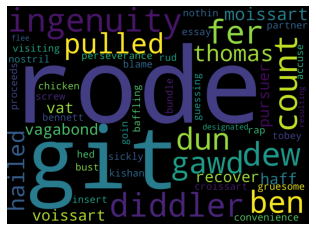

In [11]:
cloud1 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(topic_words))
plt.imshow(cloud1)
plt.axis('off')
plt.show()
